In [2]:
# 필요한 라이브러리 로딩
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [4]:
# seed 값 고정
seed = 0
np.random.seed(seed)
tf.random.set_seed(3)

In [16]:
tmp_df = pd.read_csv('/content/wine.csv', header=None)

In [17]:
df = tmp_df.sample(frac=1)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
169,7.5,0.705,0.24,1.80,0.360,15.0,63.0,0.99640,3.00,1.59,9.5,5,1
1045,6.9,0.440,0.00,1.40,0.070,32.0,38.0,0.99438,3.32,0.58,11.4,6,1
5178,7.4,0.250,0.28,7.25,0.028,14.0,78.0,0.99238,2.94,0.37,11.5,7,0
2481,7.4,0.260,0.43,6.00,0.022,22.0,125.0,0.99280,3.13,0.55,11.5,6,0
2631,7.1,0.300,0.36,6.80,0.055,44.5,234.0,0.99720,3.49,0.64,10.2,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4463,5.3,0.160,0.39,1.00,0.028,40.0,101.0,0.99156,3.57,0.59,10.6,6,0
958,6.4,0.570,0.12,2.30,0.120,25.0,36.0,0.99519,3.47,0.71,11.3,7,1
5807,5.6,0.230,0.29,3.10,0.023,19.0,89.0,0.99068,3.25,0.51,11.2,6,0
4006,7.6,0.310,0.27,5.80,0.036,23.0,109.0,0.99399,3.34,0.54,11.0,6,0


In [21]:
# df.values
# np.asarray(df)
# df.to_numpy()
dataset = df.values
X = dataset[:,:12]
Y = dataset[:,12]

In [22]:
# 모델설정
model = Sequential()
model.add(Dense(30,input_dim=12,activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [23]:
# 모델 컴파일
model.compile(loss = 'binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
# 모델 실행
model.fit(X,Y,epochs=200, batch_size=200)

In [27]:
model_dir = '/content/checkpoint/'
import os
if not os.path.exists(model_dir):
  os.mkdir(model_dir)

In [ ]:
checkpointer = ModelCheckpoint(model_dir,monitor='val_loss', vervose=2,save_best_only=True)
model = Sequential()
model.add(Dense(30,input_dim=12,activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss = 'binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(X,Y,validation_split=0.2, epochs=200, batch_size=200, verbose=0,callbacks=[checkpointer])

In [ ]:
# 모델설정
model = Sequential()
model.add(Dense(30,input_dim=12,activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# 모델 컴파일
model.compile(loss = 'binary_crossentropy',optimizer='adam',metrics=['accuracy'])
# 모델 실행
history =  model.fit(X,Y, validation_split=0.33 , epochs=3500, batch_size=500)
y_vloss =  history.history['val_loss']  # 테스트셋으로 실험결과의 오차값을 지정
y_acc = history.history['accuracy']  # 학습셋으로 측정한 정확도



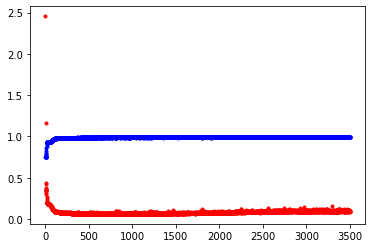

In [33]:
x_len = np.arange(len(y_acc))

plt.plot(x_len, y_vloss, "o", c="red", markersize=3)
plt.plot(x_len, y_acc, "o", c="blue", markersize=3)
plt.show()

In [ ]:
# 조기종료
eary_stopping_callback = EarlyStopping(monitor='val_loss', patience=100)
# 모델설정
model = Sequential()
model.add(Dense(30,input_dim=12,activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# 모델 컴파일
model.compile(loss = 'binary_crossentropy',optimizer='adam',metrics=['accuracy'])
# 모델 실행
history =  model.fit(X,Y, validation_split=0.33 , epochs=3500, batch_size=500, callbacks=[eary_stopping_callback])
y_vloss =  history.history['val_loss']  # 테스트셋으로 실험결과의 오차값을 지정
y_acc = history.history['accuracy']  # 학습셋으로 측정한 정확도
x_len = np.arange(len(y_acc))

plt.plot(x_len, y_vloss, "o", c="red", markersize=3)
plt.plot(x_len, y_acc, "o", c="blue", markersize=3)
plt.show()

Epoch 1/3500
1/9 [==>...........................] - ETA: 0s - loss: 0.0192 - accuracy: 0.9960
Epoch 1: val_loss improved from inf to 0.07096, saving model to /content/checkpoint2/01-0.0710.hdf5
9/9 [==============================] - 0s 14ms/step - loss: 0.0339 - accuracy: 0.9897 - val_loss: 0.0710 - val_accuracy: 0.9837
Epoch 2/3500
1/9 [==>...........................] - ETA: 0s - loss: 0.0246 - accuracy: 0.9960
Epoch 2: val_loss improved from 0.07096 to 0.06346, saving model to /content/checkpoint2/02-0.0635.hdf5
9/9 [==============================] - 0s 9ms/step - loss: 0.0368 - accuracy: 0.9887 - val_loss: 0.0635 - val_accuracy: 0.9874
Epoch 3/3500
1/9 [==>...........................] - ETA: 0s - loss: 0.0289 - accuracy: 0.9880
Epoch 3: val_loss did not improve from 0.06346
9/9 [==============================] - 0s 6ms/step - loss: 0.0370 - accuracy: 0.9876 - val_loss: 0.0643 - val_accuracy: 0.9841
Epoch 4/3500
1/9 [==>...........................] - ETA: 0s - loss: 0.0683 - accuracy

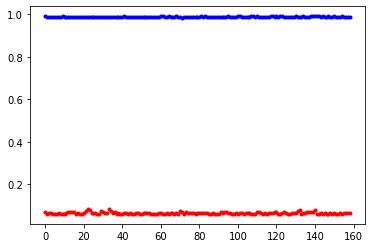

In [36]:
model_dir = '/content/checkpoint2/'
if not os.path.exists(model_dir):
  os.mkdir(model_dir)

modelpath =   model_dir+'{epoch:02d}-{val_loss:.4f}.hdf5'

# 모델 업데이트 및 저장
checkpointer =  ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
# 학습자동중단
eary_stopping_callback = EarlyStopping(monitor='val_loss',patience=100)

history =  model.fit(X,Y, validation_split=0.33 , epochs=3500, batch_size=500, verbose=1,
                     callbacks=[eary_stopping_callback,checkpointer])
y_vloss =  history.history['val_loss']  # 테스트셋으로 실험결과의 오차값을 지정
y_acc = history.history['accuracy']  # 학습셋으로 측정한 정확도
x_len = np.arange(len(y_acc))

plt.plot(x_len, y_vloss, "o", c="red", markersize=3)
plt.plot(x_len, y_acc, "o", c="blue", markersize=3)
plt.show()

'/content/checkpoint/aaaa'